# Scikit Learn

## 1) Import de dataset

In [1]:
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

boston = datasets.load_boston()
X = boston["data"]
y = boston["target"]



## 2) separer le jeu d'apprentissage du jeu de test

In [3]:
from sklearn.cross_validation import train_test_split


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

## 3) Standardiser les valeurs

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

## 4) choisir un algo et le tester
### exemple : Support Vector Machine

In [6]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

In [7]:
from sklearn import cross_validation
cross_validation.cross_val_score(svr, X, y, n_jobs=-1)

array([ 0.7002155 ,  0.31447767, -0.44395345])

## 5) aller au delà des paramètres par défaut avec un grid search

In [8]:
from sklearn import grid_search
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.523665202066 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 5.1) affiner le grid search

In [9]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_

0.602548078616 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [10]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.693803956235 SVR(C=2.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [11]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.726023263049 SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [12]:
parameters = {  'C'       : [4, 5, 6, 7]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03, 0.05, 0.07],
                 "degree" : [1,2, 3]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.757963510038 SVR(C=7, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [13]:
parameters = {  'C'       : [7, 10, 15]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.02, 0.03, 0.04],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.786655681307 SVR(C=15, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.04,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [14]:
parameters = {  'C'       : [10, 15, 20, 30]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.79642568833 SVR(C=30, cache_size=200, coef0=0.0, degree=1, epsilon=0.15, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [15]:
parameters = {  'C'       : [30, 50, 100]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [0.01, 0.05, 0.15, 0.5, 0.9, 1],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.80177386702 SVR(C=100, cache_size=200, coef0=0.0, degree=1, epsilon=1, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [16]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_score_, grid.best_estimator_


0.809282626442 SVR(C=190, cache_size=200, coef0=0.0, degree=1, epsilon=2.5, gamma=0.03,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


# 6) tester tous les algorithmes

In [17]:
def get_sklearn_algorithms(verbose = False):
    """
    Explore all submodule of sklearn and fetch functions having a 'fit' attribute.
    
    Be careful : some functions are not models (ex : crossvalidators)
    Parameters :
        debug = print or not stuff on console
    Return :
        dict : { module : [ fit_functions] }
    """
    from collections import defaultdict
    import importlib
    import sklearn
    algos = defaultdict(list)
    if verbose : print dir(sklearn)
    for nom_module in dir(sklearn):    
        if verbose : print nom_module
        try:
            to_import = "sklearn.%s"%nom_module
            module    = importlib.import_module(to_import)
            for nom_fonction in dir(module):
                fonction = getattr(module, nom_fonction)
                if hasattr(fonction, "fit"):
                    if verbose : print " nom algorithme  = ", nom_fonction
                    algos[nom_module].append(fonction)                                            
        except Exception as e:
            if verbose : print e
        if verbose: print "="*30
    return algos

In [18]:
algos = get_sklearn_algorithms()
for key in algos.keys():
    print "\n===>",key
    algos_ = []
    for algo in algos[key]:
        classe_algo = str(algo)
        nom_algo    = classe_algo[str(classe_algo).rfind(".")+1:str(classe_algo).rfind("'")]
        algos_.append(nom_algo)
    print ",".join(algos_)


===> grid_search
GridSearchCV,RandomizedSearchCV

===> svm
LinearSVC,LinearSVR,NuSVC,NuSVR,OneClassSVM,SVC,SVR,so

===> linear_model
ARDRegression,BayesianRidge,ElasticNet,ElasticNetCV,Lars,LarsCV,Lasso,LassoCV,LassoLars,LassoLarsCV,LassoLarsIC,LinearRegression,LogisticRegression,LogisticRegressionCV,MultiTaskElasticNet,MultiTaskElasticNetCV,MultiTaskLasso,MultiTaskLassoCV,OrthogonalMatchingPursuit,OrthogonalMatchingPursuitCV,PassiveAggressiveClassifier,PassiveAggressiveRegressor,Perceptron,RANSACRegressor,RandomizedLasso,RandomizedLogisticRegression,Ridge,RidgeCV,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SGDRegressor,TheilSenRegressor

===> multiclass
LabelBinarizer,OneVsOneClassifier,OneVsRestClassifier,OutputCodeClassifier,_ConstantPredictor

===> feature_extraction
DictVectorizer,FeatureHasher

===> preprocessing
Binarizer,FunctionTransformer,Imputer,KernelCenterer,LabelBinarizer,LabelEncoder,MaxAbsScaler,MinMaxScaler,MultiLabelBinarizer,Normalizer,OneHotEncoder,PolynomialFe

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [20]:
performances               = {}
modeles_a_tester           = []
classes_de_models_a_tester = algos.keys()
for classe_de_models in classes_de_models_a_tester:
    modeles_a_tester.extend(algos[classe_de_models])
    
for pointeur_vers_algo in modeles_a_tester:
    try:
        algorithme = pointeur_vers_algo()
        doc        = algorithme.__doc__
        name       = doc[:min(doc.find(":"), 25)].strip()
        print name
        algorithme.fit(X_train, y_train)
        performance = algorithme.score(X_test, y_test)
        print performance
        if 0<performance and performance<1:
            performances[name] = [performance]
    except Exception as e:
        if "label" in str(e): print "Algo de classification"
        else                : print str(e)[:50]
    print "="*30
    

__init__() takes at least 3 arguments (1 given)
__init__() takes at least 3 arguments (1 given)
Linear Support Vector Cla
Algo de classification
Linear Support Vector Reg
0.624220935517
Nu-Support Vector Classif
Algo de classification
Nu Support Vector Regress
0.564880902431
Unsupervised Outlier Dete
'OneClassSVM' object has no attribute 'score'
C-Support Vector Classifi
Algo de classification
Epsilon-Support Vector Re
0.586548904065
'module' object is not callable
Bayesian ARD regression.
0.688404936772
Bayesian ridge regression
0.692460878296
Linear regression with co
0.590802318843
Elastic Net model with it
0.69329989144
Least Angle Regression mo
0.694111520272
Cross-validated Least Ang
0.694111520272
Linear Model trained with
0.616216267602
Lasso linear model with i
0.693928585149
Lasso model fit with Leas
-0.000756462157087
Cross-validated Lasso, us
0.694111520272
Lasso model fit with Lars
0.69270810921
Ordinary least squar
0.694111520272
Logistic Regression (aka
Algo de classific

/Users/romain/anaconda/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


'RandomizedLasso' object has no attribute 'score'
Randomized Logistic Regre
Algo de classification
Linear least squares with
0.693906053658
Ridge regression with bui
0.690917348418
Classifier using Ridge re
Algo de classification
Ridge classifier with bui
Algo de classification
Linear classifiers (SVM,
Algo de classification
Linear model fitted by mi
0.672402717103
Theil-Sen Estimator
0.469760395553
Binarize labels in a one-
fit() takes exactly 2 arguments (3 given)
__init__() takes at least 2 arguments (1 given)
__init__() takes at least 2 arguments (1 given)
__init__() takes at least 2 arguments (1 given)
'NoneType' object has no attribute 'find'
Transforms lists of featu
'numpy.ndarray' object has no attribute 'iteritems
Implements feature hashin
'FeatureHasher' object has no attribute 'score'
Binarize data (set featur
'Binarizer' object has no attribute 'score'
Constructs a transformer
'FunctionTransformer' object has no attribute 'sco
Imputation transformer fo
'Imputer' object has

In [21]:
performances

{'Bayesian ARD regression.': [0.68840493677189873],
 'Bayesian ridge regression': [0.69246087829635383],
 'Cross-validated Lasso, us': [0.69411152027190837],
 'Cross-validated Least Ang': [0.69411152027190837],
 'Cross-validated Orthogona': [0.66128207085683877],
 'Elastic Net model with it': [0.69329989144004933],
 'Epsilon-Support Vector Re': [0.58654890406520588],
 'Lasso linear model with i': [0.69392858514936284],
 'Lasso model fit with Lars': [0.69270810920965797],
 'Least Angle Regression mo': [0.69411152027190837],
 'Linear Model trained with': [0.6162162676016103],
 'Linear Support Vector Reg': [0.62422093551749436],
 'Linear least squares with': [0.69390605365792324],
 'Linear model fitted by mi': [0.67240271710269794],
 'Linear regression with co': [0.59080231884313761],
 'Nu Support Vector Regress': [0.56488090243079181],
 'Ordinary least squar': [0.69411152027190792],
 'Orthogonal Matching Pursu': [0.54880749639222981],
 'Passive Aggressive Regres': [0.57036985859197564],


# 7) Faire des graphiques de comparaisons

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame(performances).T

In [25]:
col_name = "performance"
df.columns = [col_name]

In [26]:
df = df.sort_values(col_name)

In [27]:
df

,performance
RANSAC (RANdom SAmple Con,0.038495
Theil-Sen Estimator,0.469760
Orthogonal Matching Pursu,0.548807
Nu Support Vector Regress,0.564881
Passive Aggressive Regres,0.570370
Epsilon-Support Vector Re,0.586549
Linear regression with co,0.590802
Linear Model trained with,0.616216
Linear Support Vector Reg,0.624221
Cross-validated Orthogona,0.661282


In [28]:
liste_des_performances = df.performance.values
gains = [0]
for indice, performance in enumerate(liste_des_performances):
    if indice>0:
        previous_value = liste_des_performances[indice-1]
        current_value  = liste_des_performances[indice]
        gain = (current_value - previous_value) / previous_value
        gains.append(round(gain*100, 2))
df["gains"] = gains

In [29]:
df = df.drop("gains", axis=1)

In [30]:
df

,performance
RANSAC (RANdom SAmple Con,0.038495
Theil-Sen Estimator,0.469760
Orthogonal Matching Pursu,0.548807
Nu Support Vector Regress,0.564881
Passive Aggressive Regres,0.570370
Epsilon-Support Vector Re,0.586549
Linear regression with co,0.590802
Linear Model trained with,0.616216
Linear Support Vector Reg,0.624221
Cross-validated Orthogona,0.661282


In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

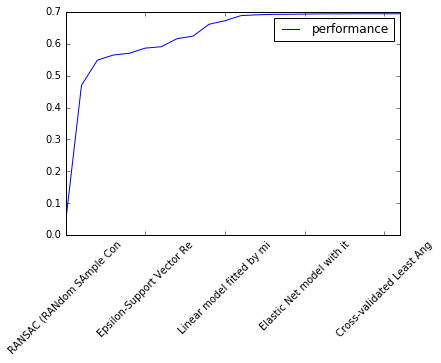

In [32]:
df = df.sort_values(col_name)
ax = df.plot(rot=45, x_compat=True)

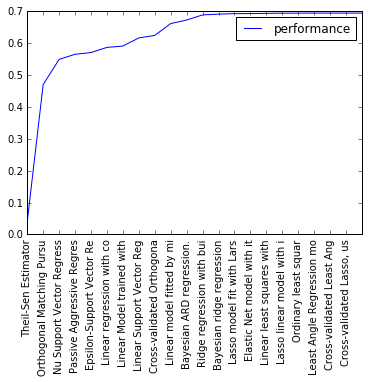

In [33]:
df = df.sort_values(col_name)
ax = df.plot(rot=90, x_compat=True)
ax.xaxis.set_ticklabels(df.index)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

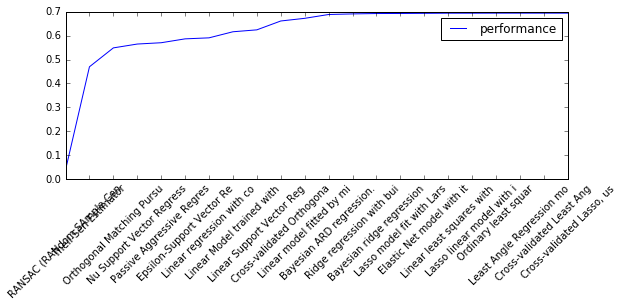

In [34]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(rot=45, ax=axes)


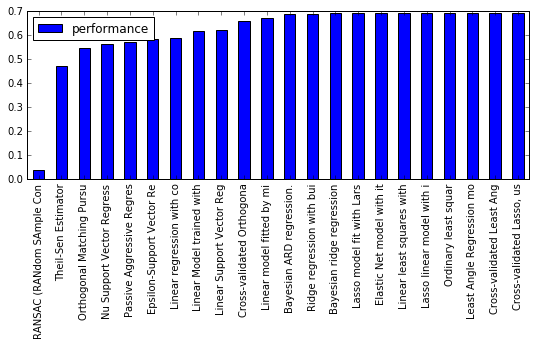

In [35]:
fig , axes = plt.subplots(1,1)
fig.set_size_inches(9,3)
df = df.sort_values(col_name )
axes.xaxis.set_ticklabels(df.index)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
df.plot(kind='bar', rot=90, ax=axes)

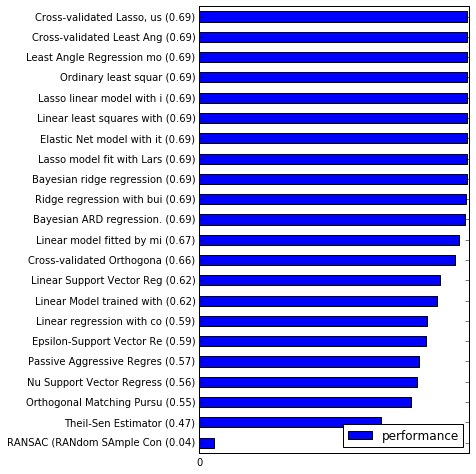

In [36]:
new_labels = []
for i, index in enumerate(df.index):
    new_label = "%s (%.2f)"%(index,df.performance[i])
    new_labels.append(new_label.replace("\n", " "))
    
fig , axes = plt.subplots(1,1)
df.index = new_labels
fig.set_size_inches(15,8)
fig.subplots_adjust(left=0.65)
df.sort_values(col_name).plot(kind='barh', ax=axes)
axes.xaxis.set_major_locator(ticker.MultipleLocator(1))

pass